# This notebook contains:
	•	ARIMA Model
	•	GARCH Model
	•	Forecasting

✅ Data loaded successfully!
⏳ Training ARIMA model...
✅ ARIMA model training complete!
⏳ Forecasting next 30 days...
✅ Forecasting complete!


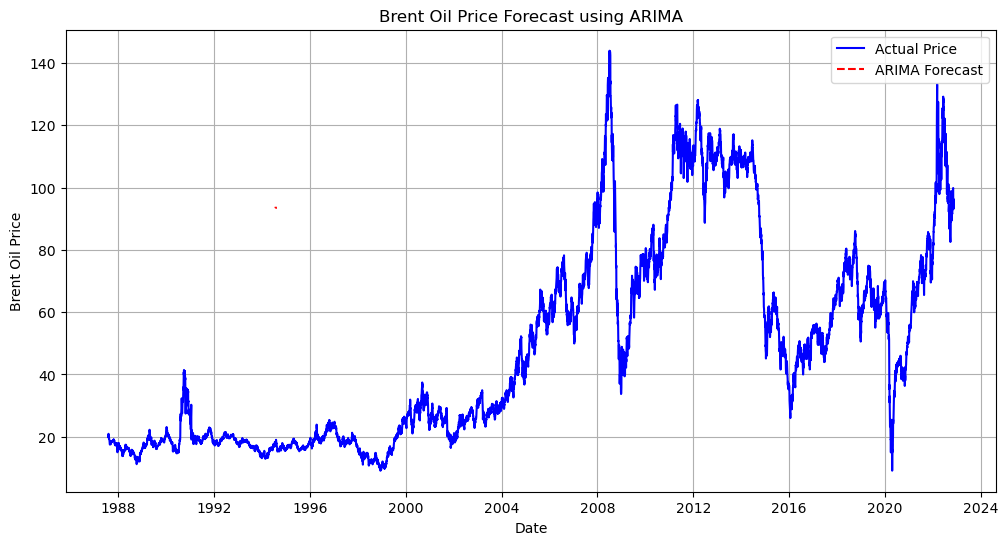

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings("ignore")

# Load processed data
try:
    df = pd.read_csv("../data/processed/BrentOilWith_features.csv", parse_dates=["Date"], index_col="Date")
    print("✅ Data loaded successfully!")
except FileNotFoundError:
    print("❌ Error: Processed data file not found. Please check the file path.")
    raise

# Ensure the "Price" column exists
if "Price" not in df.columns:
    raise KeyError("❌ Error: The dataset does not contain a 'Price' column. Check your preprocessing step.")

# Fit ARIMA model (Auto Order Selection)
try:
    print("⏳ Training ARIMA model...")
    arima_model = ARIMA(df["Price"], order=(1,1,1))  # Order (p,d,q) can be optimized
    arima_result = arima_model.fit()
    print("✅ ARIMA model training complete!")
except Exception as e:
    print(f"❌ Error while fitting ARIMA model: {e}")
    raise

# Forecast next 30 days
forecast_steps = 30
try:
    print(f"⏳ Forecasting next {forecast_steps} days...")
    forecast = arima_result.forecast(steps=forecast_steps)
    print("✅ Forecasting complete!")
except Exception as e:
    print(f"❌ Error during forecasting: {e}")
    raise

# Plot results
plt.figure(figsize=(12,6))
plt.plot(df["Price"], label="Actual Price", color="blue")
plt.plot(forecast, label="ARIMA Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Brent Oil Price")
plt.title("Brent Oil Price Forecast using ARIMA")
plt.legend()
plt.grid(True)
plt.show()